In [1]:
import pandas as pd
import matplotlib.pyplot as plt

renewables_df = pd.read_csv('renewable-share-energy.csv')
co2_df = pd.read_csv('consumption-co2-per-capita.csv')

In [38]:
gdp_file = "world_bank_GDP_per_country.csv"

In [54]:
def renewables_gdp_percapita(directory, regional_entity):
    dataframe = pd.read_csv(directory, skiprows=range(4))

    # Filter the dataframe by the regional entity
    filtered_data = dataframe[dataframe['Country Name'] == regional_entity]

    #filtered_data.iloc[:, 4:] = filtered_data.iloc[:, 4:].interpolate(method='linear', axis=1)
    display(filtered_data)

    gdp_dict = {}
    for column in filtered_data.columns[4:]:  # GDP values start from the 5th column
        year = column
        gdp_value = filtered_data[column].values[0]  # Get the value for the specific year
        gdp_dict[year] = gdp_value
    
    return gdp_dict


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
77,France,FRA,GDP (current US$),NY.GDP.MKTP.CD,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,...,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.639009e+12,2.957880e+12,2.782905e+12,NaN


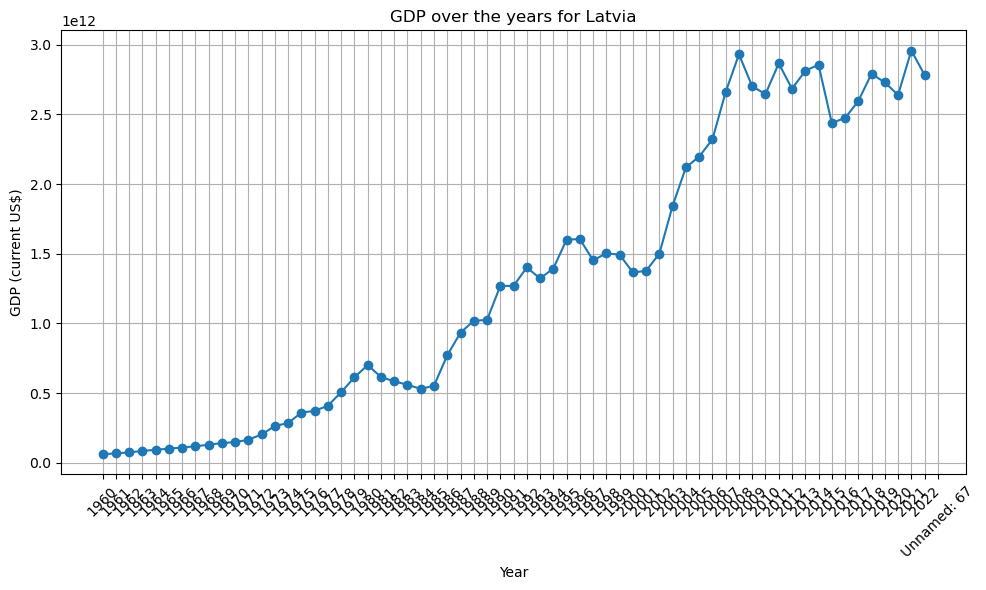

In [58]:


gdp_data = renewables_gdp_percapita(gdp_file, "France")

# Create lists for years and GDP values from the dictionary
years = list(gdp_data.keys())
gdp_values = list(gdp_data.values())

# Plotting the GDP values over the years
plt.figure(figsize=(10, 6))
plt.plot(years, gdp_values, marker='o', linestyle='-')
plt.title(f"GDP over the years for Latvia")
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


In [59]:
renewables_gdp_percapita(gdp_file, regional_entity="France")

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
77,France,FRA,GDP (current US$),NY.GDP.MKTP.CD,6.222548e+10,6.746164e+10,7.560753e+10,8.475920e+10,9.400785e+10,1.015372e+11,...,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.639009e+12,2.957880e+12,2.782905e+12,NaN


{'1960': 62225478000.8822,
 '1961': 67461644222.0352,
 '1962': 75607529809.9288,
 '1963': 84759195105.8693,
 '1964': 94007851047.3678,
 '1965': 101537248148.427,
 '1966': 110045852177.928,
 '1967': 118972977486.207,
 '1968': 129785441507.456,
 '1969': 141903068680.309,
 '1970': 148456359985.827,
 '1971': 165966615366.402,
 '1972': 203494148244.473,
 '1973': 264429876252.21,
 '1974': 285552373158.756,
 '1975': 360832186018.051,
 '1976': 372319038514.067,
 '1977': 410279486493.715,
 '1978': 506707848837.209,
 '1979': 613953129818.07,
 '1980': 701288419745.421,
 '1981': 615552202776.101,
 '1982': 584877732308.614,
 '1983': 559869179791.72,
 '1984': 530683779929.445,
 '1985': 553138414367.061,
 '1986': 771470783218.108,
 '1987': 934173305685.911,
 '1988': 1018847043277.17,
 '1989': 1025211803413.53,
 '1990': 1269179616913.63,
 '1991': 1269276828275.78,
 '1992': 1401465923172.24,
 '1993': 1322815612694.0,
 '1994': 1393982750472.59,
 '1995': 1601094756209.75,
 '1996': 1605675086549.56,
 '199